In [3]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [4]:
# Display a grid of images
def display_image(images,labels,class_labels,num_images):
    grid_size = int(num_images**0.5)  # Grid size for the images (e.g., 4x4 for 16 images)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [5]:
#load the CIFAR-10 dataset
(trainX,trainY),(testX,testY) = cifar10.load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))


trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


In [6]:
# CIFAR-10 class labels
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat",
    "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
]

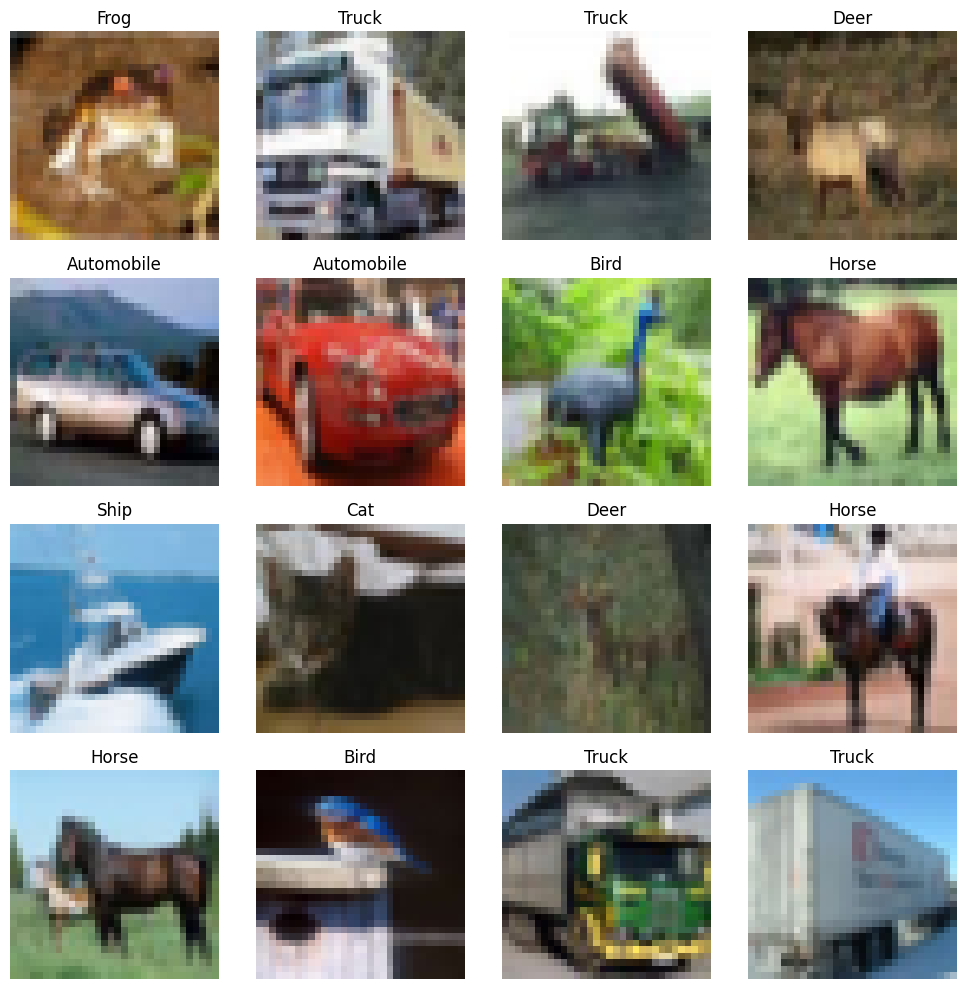

In [7]:
display_image(trainX,trainY,class_labels,16)

### CNN Model

In [8]:
#data normalization
trainX = trainX/255.0
testX = testX/255.0

In [9]:
trainY = trainY.reshape(-1,)
testY = testY.reshape(-1,)

#convert it into one-hot encoding method
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)
print(trainY[:4])
print(trainY.shape)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(50000, 10)


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

#input layer
inputs = Input(shape=(32,32,3),name='InputLayer')

#first convolutional layer block
x = Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

#second convolution block
x = Conv2D(filters=64,kernel_size=(3,3,),activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

#third convolution block
x = Conv2D(filters=28,kernel_size=(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

#fully connected layers
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.3)(x)

#output layer
outputs = Dense(10,activation='softmax',name='outputLayer')(x)

#model creation
model = Model(inputs=inputs,outputs=outputs,name='CNN-Multi-Classifier')
#model summary
model.summary()


Model: "CNN-Multi-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 28)       │        16,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 28)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 28)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,926 (398.15 KB)

 Trainable params: 101,926 (398.15 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, batch_size=64, epochs=10, validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3730 - loss: 1.6846 - val_accuracy: 0.4748 - val_loss: 1.4270
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.4705 - loss: 1.4652 - val_accuracy: 0.5708 - val_loss: 1.1918
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.5161 - loss: 1.3391 - val_accuracy: 0.5982 - val_loss: 1.1400
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.5554 - loss: 1.2540 - val_accuracy: 0.6396 - val_loss: 1.0524
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.5685 - loss: 1.2119 - val_accuracy: 0.5974 - val_loss: 1.2074
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.5904 - loss: 1.1631 - val_accuracy: 0.6496 - val_loss: 0.9964
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.6033 - loss: 1.1272 - val_accuracy: 0.6782 - val_loss: 0.9215
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.6131 - loss: 1.0922 - 

[0.4026222229003906, 0.485577791929245, 0.5251555442810059, 0.5572666525840759, 0.5736666917800903, 0.5935111045837402, 0.6050222516059875, 0.617377758026123, 0.6285555362701416, 0.6330666542053223]


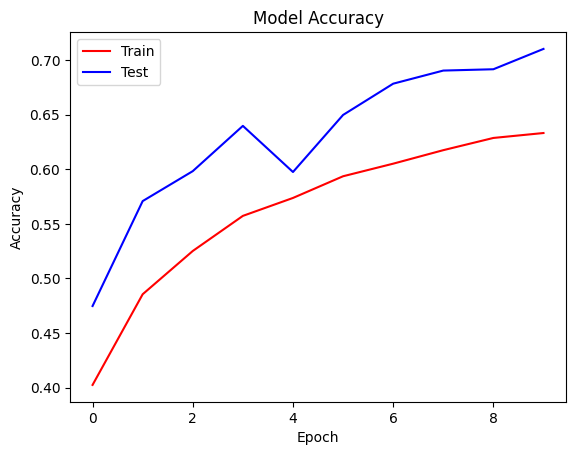

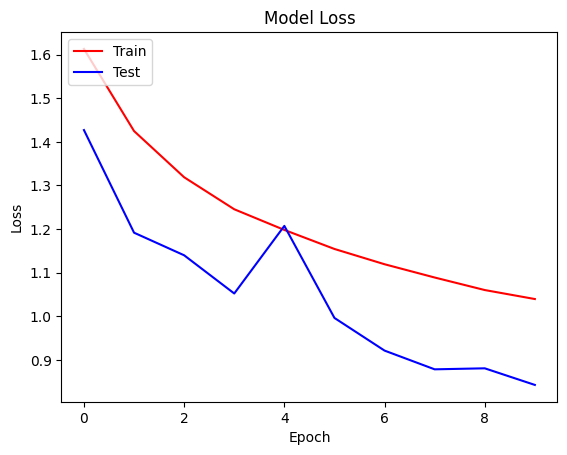

In [17]:
print(history.history['accuracy'])
# Plot training & validation accuracy
plt.plot(history.history['accuracy'],color='r')# Access training accuracy over epochs
plt.plot(history.history['val_accuracy'],color='b')# Access validation accuracy over epochs
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'],color='r')# Access loss during training
plt.plot(history.history['val_loss'],color='blue')# Access validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [18]:
# Evaluate model performance
result = model.evaluate(testX, testY)
print("Test Loss:", result[0])
print("Test Accuracy:", result[1])

# Predict Y values
predictY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))
#The np.argmax() function in NumPy is used to find the index of the maximum value

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7035 - loss: 0.8685
Test Loss: 0.8674274682998657
Test Accuracy: 0.6991000175476074
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
OriginalY   PredictedY
=========   ==========
3 		 3
8 		 8
8 		 8
0 		 0
6 		 6
6 		 6
1 		 1
6 		 4
3 		 3
1 		 1


In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encoding

# Define a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc * 100:.2f}%")


c:\Users\Israil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.3194 - loss: 1.8310 - val_accuracy: 0.4903 - val_loss: 1.3819
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.5301 - loss: 1.3052 - val_accuracy: 0.5352 - val_loss: 1.2899
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6046 - loss: 1.1165 - val_accuracy: 0.6679 - val_loss: 0.9443
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6574 - loss: 0.9686 - val_accuracy: 0.6713 - val_loss: 0.9276
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.6965 - loss: 0.8730 - val_accuracy: 0.6954 - val_loss: 0.8636
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7210 - loss: 0.7891 - val_accuracy: 0.7176 - val_loss: 0.8210
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7464 - loss: 0.7287 - val_accuracy: 0.7110 - val_loss: 0.8270
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7643 - loss: 0.6665 - 